## ML-LAB-1 EX-1
## Imports

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## Importing the data 

In [29]:
data=pd.read_csv("mtcars.csv")
data.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


## Splitting the data in X and Y

In [86]:
X=data.iloc[:,6]
y=data.iloc[:,1]
m=len(y)

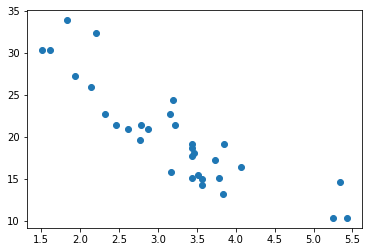

In [87]:
plt.scatter(X,y)
plt.show()

In [88]:
X = X[:,np.newaxis]
y = y[:,np.newaxis]
theta = np.zeros([2,1])
iterations = 1500
alpha = 0.01
ones = np.ones((m,1))
X = np.hstack((ones, X))

<ipython-input-88-6d3484cad85d>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = X[:,np.newaxis]
<ipython-input-88-6d3484cad85d>:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:,np.newaxis]


## Computing the Cost Function

In [33]:
def computeCost(X, y, theta):
    temp = np.dot(X, theta) - y
    J=np.sum(np.power(temp, 2)) / (2*m)
    return J

## User defined function myFinLinReg

In [53]:
def myFnLinReg_SGD(X, y, theta, alpha, iterations):
    for _ in range(iterations):
        d_theta = np.dot(X, theta) - y
        d_theta = np.dot(X.T, d_theta)
        theta = theta - (alpha/m) * d_theta
    return theta

In [61]:
num=100
def myFnLinReg_MB(X, y, theta, alpha, iterations):
    for i in range(iterations):
        d_theta = np.dot(X, theta) - y
        d_theta = np.dot(X.T, d_theta)
        if(i%num==0):
            theta = theta - (alpha/m) * d_theta
    return theta

In [63]:
def myFnLinReg_GD(X, y, theta, alpha, iterations):
    for _ in range(iterations):
        d_theta = np.dot(X, theta) - y
        d_theta = np.dot(X.T, d_theta)
    theta = theta - (alpha/m) * d_theta
    return theta

## Splitting the data set

In [64]:
X_train=X[:22]
X_test=X[23:]
y_train=y[:22]
y_test=y[23:]
print(X_train)
print(X_test.shape)
print(y_train)
print(y_test.shape)

[[1.    2.62 ]
 [1.    2.875]
 [1.    2.32 ]
 [1.    3.215]
 [1.    3.44 ]
 [1.    3.46 ]
 [1.    3.57 ]
 [1.    3.19 ]
 [1.    3.15 ]
 [1.    3.44 ]
 [1.    3.44 ]
 [1.    4.07 ]
 [1.    3.73 ]
 [1.    3.78 ]
 [1.    5.25 ]
 [1.    5.424]
 [1.    5.345]
 [1.    2.2  ]
 [1.    1.615]
 [1.    1.835]
 [1.    2.465]
 [1.    3.52 ]]
(9, 2)
[[21. ]
 [21. ]
 [22.8]
 [21.4]
 [18.7]
 [18.1]
 [14.3]
 [24.4]
 [22.8]
 [19.2]
 [17.8]
 [16.4]
 [17.3]
 [15.2]
 [10.4]
 [10.4]
 [14.7]
 [32.4]
 [30.4]
 [33.9]
 [21.5]
 [15.5]]
(9, 1)


In [69]:
theta = np.zeros([2,1])
iterations = 5000
alpha = 0.01
theta=myFnLinReg_SGD(X_train,y_train,theta,alpha,iterations)
print(theta)

[[35.10447125]
 [-4.55896613]]


In [70]:
J=computeCost(X_train,y_train,theta)
J

3.2515892315676305

## Predicted value of mpg whose weigth is 6.7

In [75]:
val=np.array([6.7])
y_pred=theta[0]+theta[1]*val
print(y_pred)

[4.55939815]


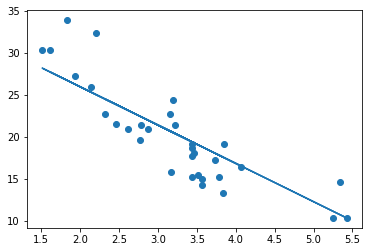

In [76]:
plt.scatter(X[:,1], y)
plt.plot(X[:,1], np.dot(X, theta))
plt.show()

## RSME and R2 for the test set

In [77]:
def predict(X,theta):
    m=X.shape[0]
    y_preds=np.zeros((m,1))
    y_preds = np.dot(X,theta)
    return y_preds

In [78]:
data_preds = (predict(X_test,theta))

In [80]:
from sklearn.metrics import r2_score,mean_squared_error
lin_mse=mean_squared_error(y_test,data_preds)
lin_rmse=np.sqrt(lin_mse)
lin_rmse

2.8744026859905634

In [81]:
r2_score(y_test,data_preds)

0.7347895099113064